# Задача по определению положительной/негативной окраски записей в дневниках с привязкой к знакам зодиака

## Импорт дневников за определенный период

In [223]:
import dump

In [224]:
dw = dump.Wrapper(csvpath='./dump')

In [225]:
notes = dw.notes[(1987, 6, 1) : (1987, 8, 31)]

In [226]:
len(notes)

613

In [227]:
notes[116].raw

['72639',
 '160',
 'Анава. Пятница. Наконец, вчера по заявке Константиныча (офицер ГРУ ГШ) отработали по «духам» штурмовики. Что они бросали — не знаю, но гула, грома и пыли было много. За тебя, Валерий Козин, за тебя, Михаил Матвеев!    \nКажется, вчера сделал глупость. Вертолетчики жаловались, что мы их плохо прикрываем, на что я ляпнул, что ДШК, их обстрелявший, мы тут же подавили. Сегодня обработали перед их прилетом пару целей, а вчера обнаружили новую кладку для  ДШК на 8-м посту и тут же ее разбили. У замкомэска вертолетчиков округлились глаза, и он сказал: «Вот это нам надо знать всегда, где у них точки...», и после этого «вертушки» несколько суток в нашем небе не появлялись... На постах кончается вода, надо забросить боеприпасы, кончается питание к радиостанциям, еле держим связь, а «вертушки» лететь не хотят. Ребятам до замены остался месяц, легли на «сохранение». А придет новый состав эскадрильи, вот намучаемся, пока те, новые, наберутся опыта.    \nВ «группировке» жизнь теч

In [228]:
id_to_note = dict()
for n in notes:
    id_to_note[n.ID] = n.text, n.date

## Оформление словаря слов с рейтингом 1/0/-1 для каждой окраски (положительная, нейтральная, отрицательная) 

In [229]:
with open ('rusentlex.txt', 'r', encoding='utf-8') as f:
    text = f.readlines()

In [230]:
d = {}
for line in text:
    line_ = line.split(', ')
    if line_[3] == 'negative':
        d[line_[0]]=-1
    elif line_[3] == 'positive':
        d[line_[0]]=1
    else:
        d[line_[0]]=0

In [231]:
d

{'аборт': -1,
 'абортивный': -1,
 'абракадабра': -1,
 'абсурд': -1,
 'абсурдность': -1,
 'абсурдный': -1,
 'авантюра': -1,
 'авантюризм': -1,
 'авантюрист': -1,
 'авантюристический': -1,
 'авантюристка': -1,
 'авантюристский': -1,
 'авантюрный': -1,
 'аварийная защита': 0,
 'аварийность': -1,
 'аварийный': -1,
 'авария': -1,
 'авиакатастрофа': -1,
 'авиакрушение': -1,
 'авианалет': -1,
 'авиаудар': -1,
 'авиационный налет': -1,
 'авитаминоз': -1,
 'авитаминозный': -1,
 'аврал': -1,
 'авральный': -1,
 'автовор': -1,
 'автоматная очередь': -1,
 'автоматный огонь': -1,
 'автомобильная пробка': -1,
 'автоподстава': -1,
 'авторитаризм': -1,
 'авторитарность': -1,
 'авторитарный': -1,
 'авторитет падает': -1,
 'авторитет снижается': -1,
 'авторитет снизился': -1,
 'авторитет упал': -1,
 'авторитет': 1,
 'авторитетность': 1,
 'авторитетный': 1,
 'авторитетом не пользоваться': -1,
 'автотрасса перекрыта': -1,
 'автоугон': -1,
 'автоугонщик': -1,
 'агент иностранной разведки': -1,
 'агитка': -1

## Лемматизация дневниковых записей с помощью майстема

In [232]:
from pymystem3 import Mystem

mystem_object = Mystem()
mystem_object.start()

In [233]:
doc = []
id_to_words = dict()

for key, value in id_to_note.items():
    for word in value[0].split(' '):
        word = word.lower().strip("[“«–»—!\$%&'()*+,./:;<=>?@^_`{|}~'*-–—...]")
        if word != '':
            word = mystem_object.analyze(word)
            if word[0].get('analysis') != []:
                try:
                    doc.append(word[0]['analysis'][0]['lex'])
                except:
                    continue
    id_to_words[key] = doc, value[1]
    doc = []

## Обработка записей и присвоение им рейтинга

In [234]:
i = 0
l = 0
id_to_sem_words = dict()

for key, value in id_to_words.items():
    for word in value[0]:
        if word in d:
            i += d[word]
            l += 1
        else:
            continue
    id_to_sem_words[key] = i/l, value[1]
    i = 0
    l = 1

In [235]:
id_to_sem_words

{16906: (0.14285714285714285, (1987, 6, 30)),
 19356: (0.0, (1987, 6, 20)),
 19357: (0.0, (1987, 7, 1)),
 19358: (-0.6363636363636364, (1987, 7, 6)),
 19359: (-0.45, (1987, 7, 7)),
 19360: (0.5, (1987, 7, 9)),
 19361: (-0.15, (1987, 8, 9)),
 19841: (-0.05128205128205128, (1987, 6, 11)),
 19842: (0.5, (1987, 6, 1)),
 19843: (0.2222222222222222, (1987, 6, 2)),
 19844: (-0.35714285714285715, (1987, 6, 3)),
 19845: (-0.1, (1987, 6, 6)),
 19846: (-0.25, (1987, 6, 7)),
 19847: (-0.21428571428571427, (1987, 6, 8)),
 19848: (-0.1, (1987, 6, 9)),
 19849: (-0.6666666666666666, (1987, 6, 11)),
 19850: (0.125, (1987, 6, 12)),
 19851: (0.25, (1987, 6, 15)),
 19852: (-0.5454545454545454, (1987, 6, 16)),
 19853: (-0.46153846153846156, (1987, 6, 17)),
 19854: (-0.15384615384615385, (1987, 6, 18)),
 19855: (-0.4, (1987, 6, 19)),
 19856: (-0.2857142857142857, (1987, 6, 20)),
 19857: (0.0, (1987, 6, 21)),
 19858: (-0.25, (1987, 6, 23)),
 19859: (-0.4444444444444444, (1987, 6, 24)),
 19860: (0.57142857142

## Создание различных словарей для знаков зодиака

In [236]:
import csv

note_to_dob = dict()

with open('prozhito_prep_table.csv', 'r', encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=";")
    header = next(reader)
    for line in reader:
        if line[1] == '01.01.1900':
            continue
        else:
            note_to_dob[line[0]] = line[1] 

In [237]:
note_to_diary = dict()

with open('notes.csv', 'r', encoding='utf-8') as f:
    reader = csv.reader(f, delimiter="#")
    for line in reader:
        note_to_diary[line[0].strip(',')] = line[1].strip(',')

In [238]:
diary_to_dob = dict()

for note, diary in note_to_diary.items():
    if note in note_to_dob:
        if diary in diary_to_dob:
            i = diary_to_dob[diary][1] + 1
            diary_to_dob[diary] = [note_to_dob[note], i]
        else:
            i = 1
            diary_to_dob[diary] = [note_to_dob[note], i]
    else:
        continue

In [239]:
diary_to_date = dict()

for diary, dob in diary_to_dob.items():
    if '.' in dob[0]:
        diary_to_date[diary] = (dob[0].split('.')[0], dob[0].split('.')[1])
    elif '-' in dob[0]:
        diary_to_date[diary] = (dob[0].split('-')[2], dob[0].split('-')[1])
    else:
        print(dob)

In [240]:
diary_to_sign = dict()

for diary, dob in diary_to_date.items():
    m = dob[1]
    d = dob[0]
    if m == '01':
        if d >= '21':
            diary_to_sign[diary] = 'Aquarius'
        else:
            diary_to_sign[diary] = 'Capricorn'
    elif m == '02':
        if d >= '20':
            diary_to_sign[diary] = 'Pisces'
        else:
            diary_to_sign[diary] = 'Aquarius'
    elif m == '03':
        if d >= '21':
            diary_to_sign[diary] = 'Aries'
        else:
            diary_to_sign[diary] = 'Pisces'
    elif m == '04':
        if d >= '21':
            diary_to_sign[diary] = 'Taurus'
        else:
            diary_to_sign[diary] = 'Aries'
    elif m == '05':
        if d >= '22':
            diary_to_sign[diary] = 'Gemini'
        else:
            diary_to_sign[diary] = 'Taurus'
    elif m == '06':
        if d >= '22':
            diary_to_sign[diary] = 'Cancer'
        else:
            diary_to_sign[diary] = 'Gemini'
    elif m == '07':
        if d >= '23':
            diary_to_sign[diary] = 'Leo'
        else:
            diary_to_sign[diary] = 'Cancer'
    elif m == '08':
        if d >= '22':
            diary_to_sign[diary] = 'Virgo'
        else:
            diary_to_sign[diary] = 'Leo'
    elif m == '09':
        if d >= '24':
            diary_to_sign[diary] = 'Libra'
        else:
            diary_to_sign[diary] = 'Virgo'
    elif m == '10':
        if d >= '24':
            diary_to_sign[diary] = 'Scorpio'
        else:
            diary_to_sign[diary] = 'Libra'
    elif m == '11':
        if d >= '23':
            diary_to_sign[diary] = 'Sagittarius'
        else:
            diary_to_sign[diary] = 'Scorpio'
    elif m == '12':
        if d >= '23':
            diary_to_sign[diary] = 'Capricorn'
        else:
            diary_to_sign[diary] = 'Sagittarius'

In [241]:
note_to_sign = dict()

for note, diary in note_to_diary.items():
    for d, sign in diary_to_sign.items():
        try:
            note_to_sign[note] = diary_to_sign[diary]
        except:
            continue

## Сопоставление знака зодиака автора и рейтинга записи

In [242]:
matched = []

for key, value in id_to_sem_words.items():
    for k, v in note_to_sign.items():
        if str(key) == str(k):
            date = str(value[1][1])+"-"+str(value[1][2])
            matched.append((v, value[0], date))
            break
        else:
            continue

In [243]:
matched

[('Capricorn', 0.5, '6-1'),
 ('Virgo', 0.6666666666666666, '6-1'),
 ('Gemini', 0.0, '6-1'),
 ('Capricorn', 0.26262626262626265, '6-1'),
 ('Capricorn', -0.5, '6-1'),
 ('Leo', 0.0, '6-1'),
 ('Sagittarius', 0.12612612612612611, '6-1'),
 ('Sagittarius', 0.0, '6-1'),
 ('Sagittarius', 0.1724137931034483, '6-1'),
 ('Scorpio', 0.5, '6-1'),
 ('Capricorn', 0.2222222222222222, '6-2'),
 ('Gemini', 0.5, '6-2'),
 ('Capricorn', -0.04040404040404041, '6-2'),
 ('Capricorn', 0.0, '6-2'),
 ('Capricorn', -0.35714285714285715, '6-3'),
 ('Gemini', 0.0, '6-3'),
 ('Capricorn', 0.2, '6-3'),
 ('Virgo', -0.5384615384615384, '6-3'),
 ('Capricorn', 0.0, '6-3'),
 ('Aries', 0.09090909090909091, '6-3'),
 ('Capricorn', 0.14864864864864866, '6-4'),
 ('Gemini', 0.0, '6-5'),
 ('Aries', 0.0, '6-5'),
 ('Capricorn', -0.1, '6-6'),
 ('Gemini', 0.1016949152542373, '6-6'),
 ('Capricorn', -0.08571428571428572, '6-6'),
 ('Virgo', 0.5, '6-6'),
 ('Pisces', 0.25, '6-6'),
 ('Pisces', -0.07547169811320754, '6-6'),
 ('Aries', 0.5714285

## Построение графика

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [245]:
signs = set()
for line in matched:
    if line[0] not in signs:
        signs.add(line[0])
    else:
        continue

In [246]:
signs

{'Aquarius',
 'Aries',
 'Cancer',
 'Capricorn',
 'Gemini',
 'Leo',
 'Libra',
 'Pisces',
 'Sagittarius',
 'Scorpio',
 'Taurus',
 'Virgo'}

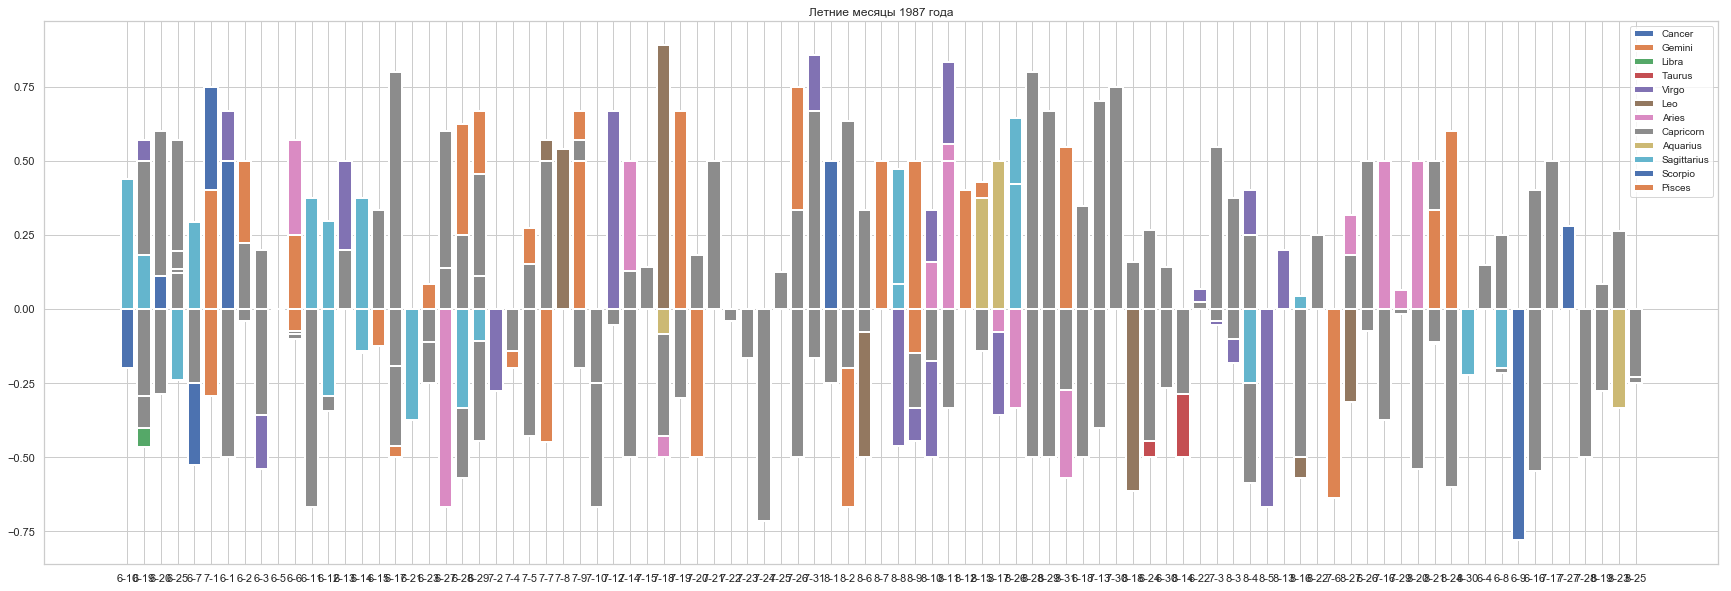

In [247]:
x = []
y = []

for sign in signs:
    for line in matched:
        if line[0] == sign:
            x.append(line[2])
            y.append(line[1])
    plt.bar(x, y, linewidth=2., label = sign)
    plt.legend(frameon=1, facecolor='white', fontsize='small')
    x = []
    y = []
fig = plt.gcf()
fig.set_size_inches(30,10)
plt.title('Летние месяцы 1987 года')
fig.savefig('2fig.png', dpi=100)